## Linear Learner estimator

In [2]:
import gzip
import pandas as pd

In [3]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
with gzip.open('compensation_cpi.csv.gz', 'rb') as f:
    df = pd.read_csv(f)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466589 entries, 0 to 1466588
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   year                1466589 non-null  int64  
 1   department          1466587 non-null  object 
 2   job_title           1466043 non-null  object 
 3   base_salary         1465890 non-null  float64
 4   overtime            1433207 non-null  float64
 5   irregular_cash      1466155 non-null  float64
 6   total_cash          1466589 non-null  float64
 7   retirement          1466589 non-null  float64
 8   health              1447602 non-null  float64
 9   other_benefits      830557 non-null   float64
 10  total_benefits      1466589 non-null  float64
 11  total_compensation  1466589 non-null  float64
 12  city_id             1466589 non-null  int64  
 13  annual_average_cpi  1466589 non-null  float64
 14  inflation_rate      1466589 non-null  float64
dtypes: float64(11),

In [6]:
df.head(3)

,year,department,job_title,base_salary,overtime,irregular_cash,total_cash,retirement,health,other_benefits,total_benefits,total_compensation,city_id,annual_average_cpi,inflation_rate
0,2020,Recreation And Park Commission,Camp Assistant,5257.50,0.0,139.32,5396.82,0.0,0.0,418.88,418.88,5815.70,2,258.8,1.2
1,2020,Registrar,Junior Clerk,7699.19,1916.9,0.00,9616.09,0.0,0.0,746.36,746.36,10362.45,2,258.8,1.2
2,2020,Registrar,Junior Clerk,2619.15,930.5,0.00,3549.65,0.0,0.0,275.51,275.51,3825.16,2,258.8,1.2


After pulling in the database, let's view how the CPI has changed over time

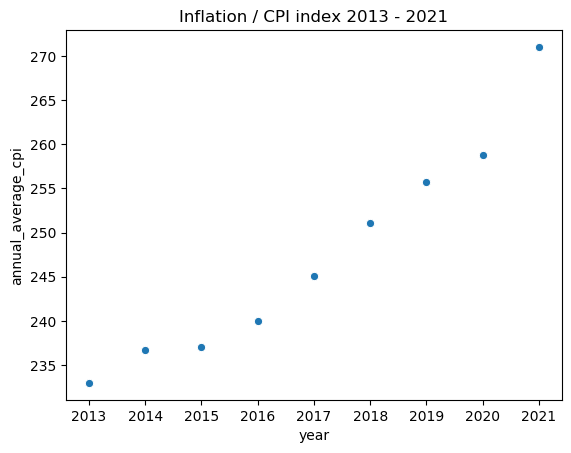

In [7]:
sns.scatterplot(data=df,x='year',y="annual_average_cpi")
plt.title("Inflation / CPI index 2013 - 2021");

### Condensing Department Names
There are more than 500 unique departments--we want that to be much smaller

In [8]:
df['department'].value_counts()

POLICE                          136819
WATER AND POWER                 109906
Public Health                    95725
RECREATION AND PARKS             84680
DPH Public Health                73093
                                 ...  
Airport-Custodians                   1
Police-Crisis Management             1
Police-TABS                          1
Attorney-Part Time                   1
DOT/Pavement Maint Southeast         1
Name: department, Length: 550, dtype: int64

In [9]:
#we have two missing department names but they are both police
df[df['department'].isna()]

,year,department,job_title,base_salary,overtime,irregular_cash,total_cash,retirement,health,other_benefits,total_benefits,total_compensation,city_id,annual_average_cpi,inflation_rate
139761,2017,NaN,Sheriff's Cadet,49630.50,15016.51,3197.52,67844.53,10619.27,12779.88,4796.56,28195.71,96040.24,2,245.1,2.1
430579,2017,NaN,Police Officer 2,116189.62,40990.09,2260.08,159439.80,20076.66,14515.01,2724.05,37315.72,196755.52,2,245.1,2.1


In [10]:
#fill in the missing police department names
df['department'].fillna('Police',inplace=True)

##### This function will condense the departments based on a dictionary

In [11]:
def replace_text(text):
    if pd.isna(text) or text is None:
        return text
    elif target_word.lower() in text.lower():
        return new_word
    else:
        return text

In [12]:
#this is the core for how the above functions works
#target_word= "Police"
#new_word= "Police"
#df['department'] = df['department'].apply(replace_text)

In [13]:
dept_dict = {
    'Police': 'Police', 'Sheriff': 'Police', "Vcet" : "Police",   
    "Fire" : "Emergency Management",    "Emergency" : "Emergency Management",
    "PW" : "Public Works",    "Public" : "Public Works",    "Water" : "Public Works",    "DOT" : "Public Works",    "Transport" : "Public Works",
    "Plan" : "Public Works",    "Building" : "Public Works",    #"District" : "Public Works",    
    "PRNS" : "Parks",    "Recre" : "Parks",    "Zoo" : "Parks",    "Parks" : "Parks",    "Arena" : "Parks",
    "City" : "City Mgmt",    "Convention" : "City Mgmt",    "Neighbor" : "City Mgmt",    "Election" : "City Mgmt",    "Council" : "City Mgmt",
    "CII" : "City Mgmt",    "Clerk" : "City Mgmt",    "Registrar" : "City Mgmt",    "Housing" : "City Mgmt",    "Mayor" : "City Mgmt",    "rda" : "City Mgmt",
    "Airport" : "Airport",    "Airside" : "Airport",
    "Finance" : "Finance",    "Auditor" : "Finance",    "Assessor" : "Finance",    "Controller" : "Finance",    "Tax" : "Finance", "Treasure" : "Finance",
    "Board" : "Law and Reg",    "Attorney" : "Law and Reg",    "Court" : "Law and Reg",
    "Ethics" : "Law and Reg",    "Probation" : "Law and Reg",    "Regulation" : "Law and Reg",
    "prt" : "Port",    "port" : "Port", "Harbor" : "Port",
    "Human" : "Human Services",    "Retire" : "Human Services",    "Child" : "Human Services",    "Service" : "Human Services",
    "Personnel" : "Human Services",    "Aging" : "Human Services",    "Women" : "Human Services",    "Pension" : "Human Services",
    "Disability" : "Human Services",    "Families" : "Human Services", "Youth" : "Human Services",
    "ESD" : "Human Services",    "Employee" : "Human Services",
    "Info" : "IT",    "Tech" : "IT",
    "Envi" : "Energy, Env, Economy",    "Energy" : "Energy, Env, Economy",    "Power" : "Energy, Env, Economy", "Econ" : "Energy, Env, Economy",
    "Science" : "Libraries, Arts, Science, Museums",    "Librar" : "Libraries, Arts, Science, Museums",    "Museum" : "Libraries, Arts, Science, Museums",
    "Memorial" : "Libraries, Arts, Science, Museums",    "Monument" : "Libraries, Arts, Science, Museums",    "Arts" : "Libraries, Arts, Science, Museums",
    "Cultur" : "Libraries, Arts, Science, Museums", "Art Commission" : "Libraries, Arts, Science, Museums"
}

In [14]:
for key in dept_dict:
    target_word= key
    new_word= dept_dict[key]
    df['department'] = df['department'].apply(replace_text)

New distribution of departments

In [15]:
df['department'].value_counts(normalize=True)

Public Works                         0.384807
Police                               0.159051
Port                                 0.098913
Parks                                0.097807
Human Services                       0.085051
Emergency Management                 0.057883
City Mgmt                            0.046575
Libraries, Arts, Science, Museums    0.022667
Law and Reg                          0.019740
Finance                              0.014328
IT                                   0.008094
Energy, Env, Economy                 0.005083
Name: department, dtype: float64

### More cleaning

Changing integers for Year and City into categorical variables

In [16]:
df['year'] = df['year'].astype('category')
df['city_id'] = df['city_id'].astype('category')

In [17]:
df.isna().sum()

year                       0
department                 0
job_title                546
base_salary              699
overtime               33382
irregular_cash           434
total_cash                 0
retirement                 0
health                 18987
other_benefits        636032
total_benefits             0
total_compensation         0
city_id                    0
annual_average_cpi         0
inflation_rate             0
dtype: int64

I feel justified filling in the null values for `health` /  `other_benefits` / `overtime` with 0 because it's the single most common practice

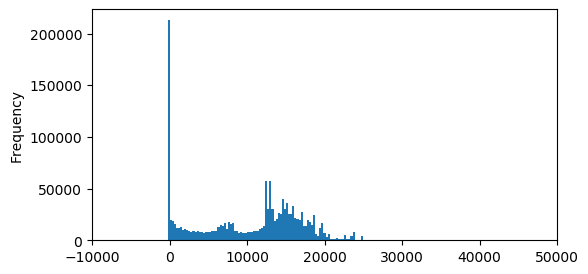

In [18]:
plt.figure(figsize=(6,3))
plt.xlim(-10000,50000)
df['health'].plot.hist(bins=1000);

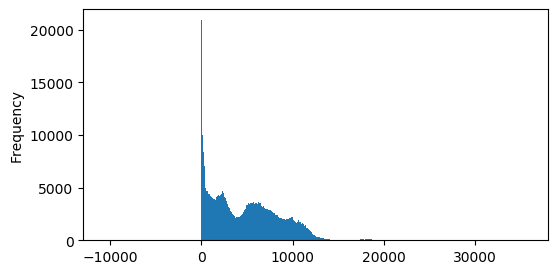

In [19]:
plt.figure(figsize=(6,3))
#plt.xlim(-5000,30000)
df['other_benefits'].plot.hist(bins=1000);

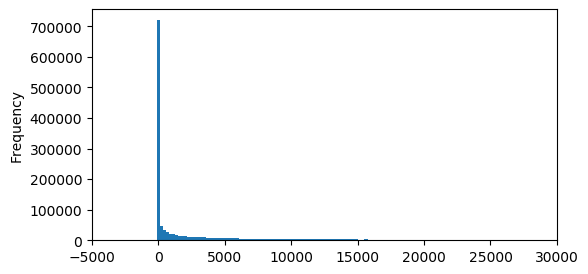

In [20]:
plt.figure(figsize=(6,3))
plt.xlim(-5000,30000)
df['overtime'].plot.hist(bins=2000);

In [21]:
df['job_title'] = df['job_title'].fillna("Not disclosed")
df['overtime'] = df['overtime'].fillna(0)
df['irregular_cash'] = df['irregular_cash'].fillna(0)
df['health'] = df['health'].fillna(0)
df['other_benefits'] = df['other_benefits'].fillna(0)

df['base_salary'] = df['base_salary'].fillna((df['total_cash'] - df['overtime'] - df['irregular_cash']))

df.isna().sum()

year                  0
department            0
job_title             0
base_salary           0
overtime              0
irregular_cash        0
total_cash            0
retirement            0
health                0
other_benefits        0
total_benefits        0
total_compensation    0
city_id               0
annual_average_cpi    0
inflation_rate        0
dtype: int64

In [22]:
df[df['base_salary'] < 0]

,year,department,job_title,base_salary,overtime,irregular_cash,total_cash,retirement,health,other_benefits,total_benefits,total_compensation,city_id,annual_average_cpi,inflation_rate
13435,2019,Port,SECURITY OFFICER,-7637.56,0.00,7637.56,0.00,1184.13,647.20,0.00,1831.33,1831.33,3,255.7,1.8
16831,2019,Public Works,PS Aide Health Services,-140.53,0.00,0.00,-140.53,-31.80,591.20,-10.91,548.49,407.96,2,255.7,1.8
22478,2019,Parks,Not disclosed,-61.44,184.32,0.00,122.88,0.00,0.00,0.00,0.00,122.88,3,255.7,1.8
27136,2019,Police,POLICE OFFICER II,-14952.00,358.80,17985.10,3391.90,0.00,0.00,0.00,0.00,3391.90,3,255.7,1.8
27549,2019,Port,GARDENER CARETAKER,-789.64,0.00,789.64,0.00,0.00,0.00,0.00,0.00,0.00,3,255.7,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439466,2021,Police,POLICE OFFICER II,-520.90,6675.33,0.00,6154.43,0.00,0.00,0.00,0.00,6154.43,3,271.0,4.7
1444156,2019,Public Works,TRAFFIC OFFICER I,-1760.00,0.00,1760.00,0.00,522.02,328.28,0.00,850.30,850.30,3,255.7,1.8
1452282,2014,City Mgmt,EVENT ATTENDANT II,-111.28,166.92,1.85,57.49,0.00,0.00,0.00,0.00,57.49,3,236.7,1.6
1453404,2014,Police,POLICE OFFICER II,-120.72,2981.78,8446.12,11307.18,-56.56,0.00,0.00,-56.56,11250.62,3,236.7,1.6


Taking a look at base salary spreads per department

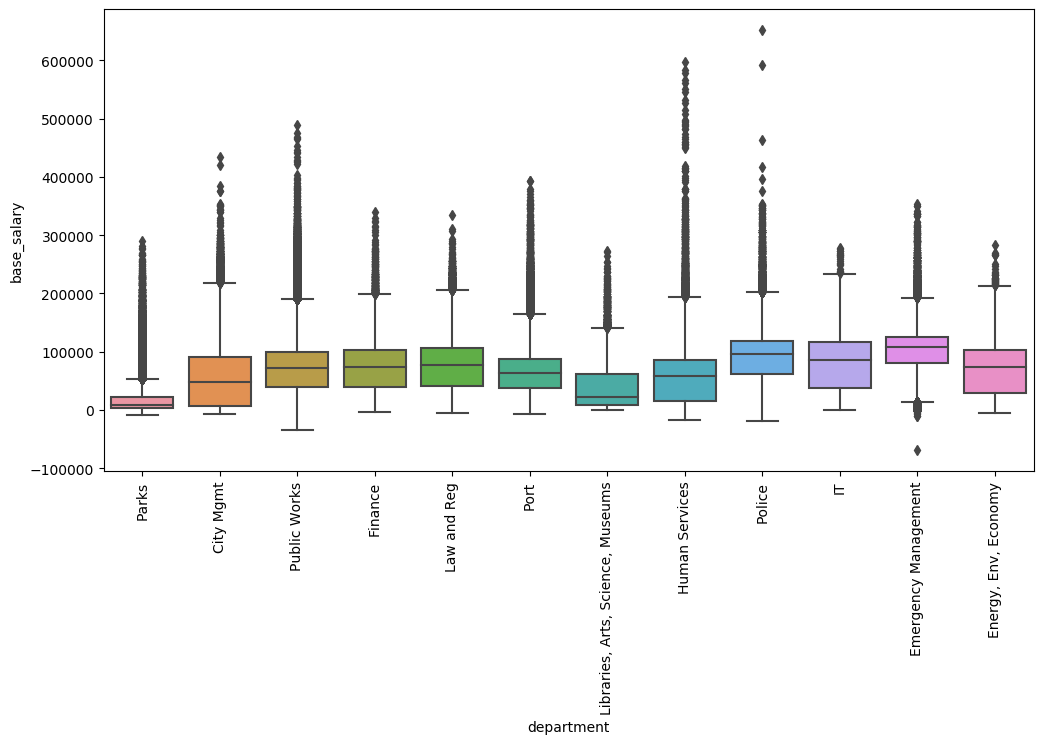

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='department',y='base_salary')
plt.xticks(rotation=90);

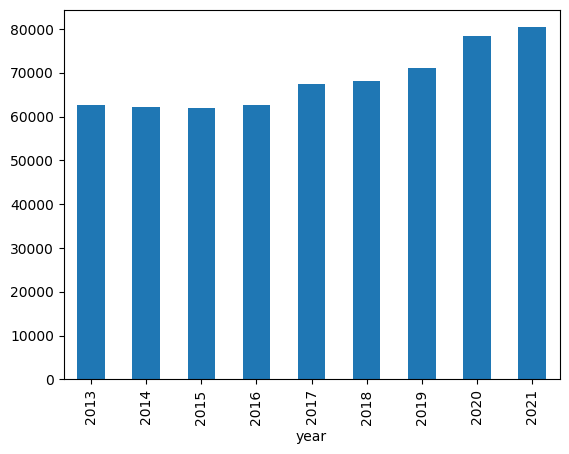

In [24]:
df.groupby('year')['base_salary'].mean().plot.bar()

### Adjusting all numbers to present-day CPI

In [25]:
df['base_salary'] = df['base_salary'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])
df['overtime'] = df['overtime'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])
df['irregular_cash'] = df['irregular_cash'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])
df['total_cash'] = df['total_cash'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])

df['retirement'] = df['retirement'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])
df['health'] = df['health'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])
df['other_benefits'] = df['other_benefits'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])
df['total_benefits'] = df['total_benefits'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])
df['total_compensation'] = df['total_compensation'] * (df['annual_average_cpi'].max() / df['annual_average_cpi'])

In [26]:
df.head()

,year,department,job_title,base_salary,overtime,irregular_cash,total_cash,retirement,health,other_benefits,total_benefits,total_compensation,city_id,annual_average_cpi,inflation_rate
0,2020,Parks,Camp Assistant,5505.341963,0.000000,145.887635,5651.229598,0.000000,0.000000,438.626275,438.626275,6089.855873,2,258.8,1.2
1,2020,City Mgmt,Junior Clerk,8062.134815,2007.263910,0.000000,10069.398725,0.000000,0.000000,781.543895,781.543895,10850.942620,2,258.8,1.2
2,2020,City Mgmt,Junior Clerk,2742.618431,974.364374,0.000000,3716.982805,0.000000,0.000000,288.497720,288.497720,4005.480526,2,258.8,1.2
3,2020,City Mgmt,Clerk,1958.802241,619.090495,0.000000,2577.892736,0.000000,0.000000,200.077164,200.077164,2777.969900,2,258.8,1.2
4,2020,Public Works,Engineer,166298.647372,0.000000,5944.554637,172243.202009,35106.269861,15799.729328,12219.283192,63125.282380,235368.484389,2,258.8,1.2


### Some visuals

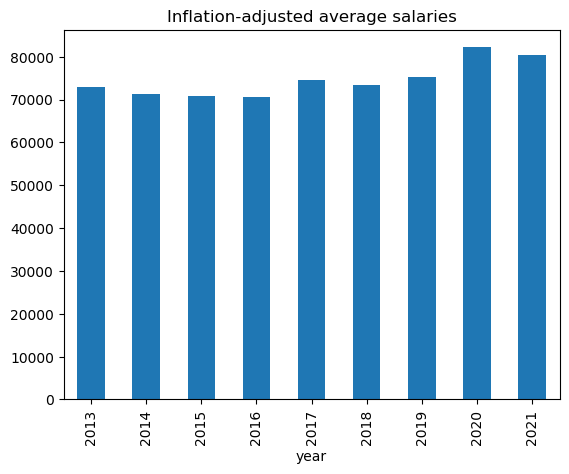

In [27]:
df.groupby('year')['base_salary'].mean().plot.bar()
plt.title("Inflation-adjusted average salaries");

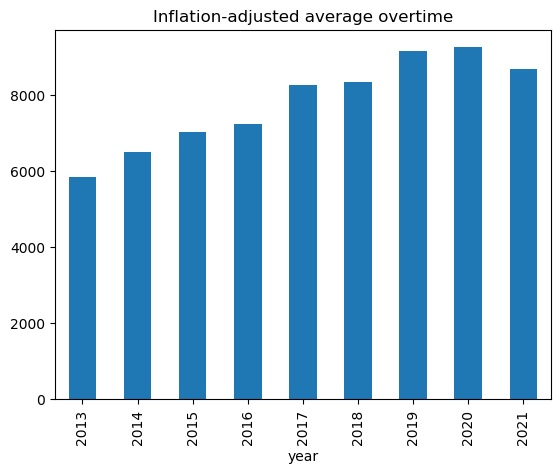

In [28]:
df.groupby('year')['overtime'].mean().plot.bar()
plt.title("Inflation-adjusted average overtime");

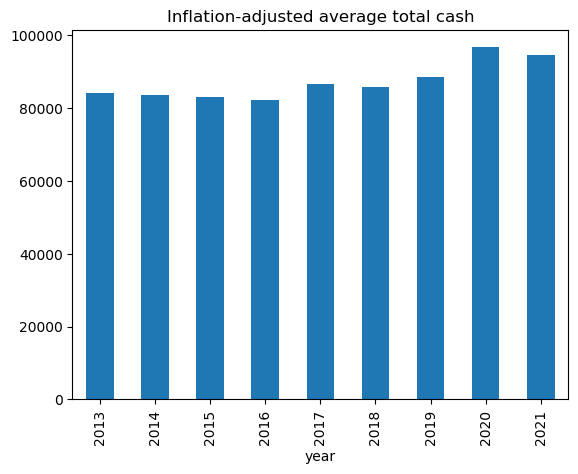

In [29]:
df.groupby('year')['total_cash'].mean().plot.bar()
plt.title("Inflation-adjusted average total cash");

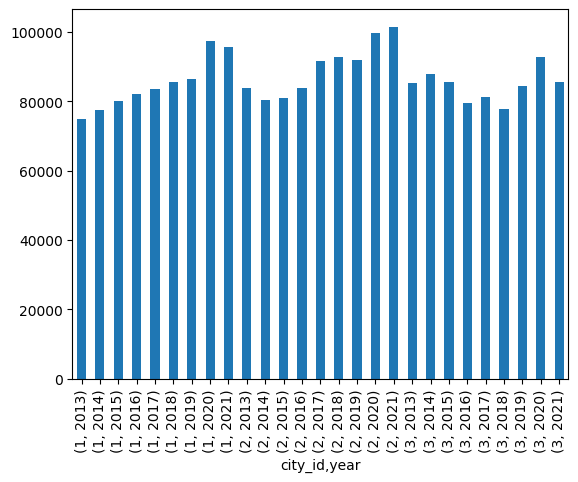

In [30]:
df.groupby(['city_id','year'])['total_cash'].mean().plot.bar()

## SageMaker regression
Following along here https://towardsdatascience.com/using-aws-sagemakers-linear-learner-to-solve-regression-problems-36732d802ba6

In [31]:
import sagemaker
import boto3

sess = sagemaker.Session()
role = sagemaker.get_execution_role()
bucket = sess.default_bucket()
region = boto3.Session().region_name

sm = boto3.Session().client(service_name="sagemaker", region_name=region)
s3 = boto3.Session().client(service_name="s3", region_name=region)

In [32]:
from sagemaker import get_execution_role
from sagemaker.sklearn.processing import SKLearnProcessor

role = get_execution_role()
sklearn_processor = SKLearnProcessor( framework_version="0.20.0", role=role, instance_type="ml.m5.xlarge", instance_count=1)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

Converting categorical variables into dummy variables (one-hot encoding)

In [35]:
pd.get_dummies(df.head(),drop_first=True)

,base_salary,overtime,irregular_cash,total_cash,retirement,health,other_benefits,total_benefits,total_compensation,annual_average_cpi,...,year_2019,year_2020,year_2021,department_Parks,department_Public Works,job_title_Clerk,job_title_Engineer,job_title_Junior Clerk,city_id_2,city_id_3
0,5505.341963,0.000000,145.887635,5651.229598,0.000000,0.000000,438.626275,438.626275,6089.855873,258.8,...,0,1,0,1,0,0,0,0,1,0
1,8062.134815,2007.263910,0.000000,10069.398725,0.000000,0.000000,781.543895,781.543895,10850.942620,258.8,...,0,1,0,0,0,0,0,1,1,0
2,2742.618431,974.364374,0.000000,3716.982805,0.000000,0.000000,288.497720,288.497720,4005.480526,258.8,...,0,1,0,0,0,0,0,1,1,0
3,1958.802241,619.090495,0.000000,2577.892736,0.000000,0.000000,200.077164,200.077164,2777.969900,258.8,...,0,1,0,0,0,1,0,0,1,0
4,166298.647372,0.000000,5944.554637,172243.202009,35106.269861,15799.729328,12219.283192,63125.282380,235368.484389,258.8,...,0,1,0,0,1,0,1,0,1,0


Setting up X and y train and test data sets in a standard manner

In [82]:
X = pd.get_dummies(df[['base_salary', 'overtime', 'irregular_cash', 'year',  'department',  'annual_average_cpi', 'city_id']],drop_first=True)
y = df['total_benefits']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Scaling the data

In [100]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### Following along with external resource linked above

In [101]:
prefix = "linear-learner"

In [102]:
import io
import sagemaker.amazon.common as smac
import os

In [103]:
#upload training data
buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, X_train_sc, y_train.reset_index(drop=True))
buf.seek(0)

key = 'linear-train-data'

boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)

print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-us-east-1-117315948243/linear-learner/train/linear-train-data


In [104]:
buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, X_test_sc, y_test.reset_index(drop=True))
buf.seek(0)

key = 'linear-test-data'

boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)

print('uploaded training data location: {}'.format(s3_test_data))

uploaded training data location: s3://sagemaker-us-east-1-117315948243/linear-learner/test/linear-test-data


In [105]:
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-us-east-1-117315948243/linear-learner/output


#### Training Linear Learner

In [106]:
from sagemaker.amazon.amazon_estimator import image_uris

In [107]:
container = image_uris.retrieve('linear-learner', boto3.Session().region_name)

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sess)

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: 1.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [108]:
linear.set_hyperparameters(feature_dim = 25,
                           predictor_type = 'regressor',
                           mini_batch_size = 20,
                           epochs = 5,
                           num_models = 10,
                           loss = 'absolute_loss')

In [109]:
linear.fit({'train': s3_train_data})

INFO:sagemaker:Creating training-job with name: linear-learner-2023-04-06-21-42-00-708


2023-04-06 21:42:01 Starting - Starting the training job...
2023-04-06 21:42:19 Starting - Preparing the instances for training......
2023-04-06 21:43:27 Downloading - Downloading input data...
2023-04-06 21:43:58 Training - Downloading the training image........Docker entrypoint called with argument(s): train
Running default environment configuration script
[04/06/2023 21:45:25 INFO 139636117940032] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'auto', 'margin': '1.0', 'quantile': '0.5', 'loss_insensitivity': '0.01', 'huber_delta':

##### Endpoint creation & Model evaluation

In [114]:
linear_regressor = linear.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2023-04-06-22-28-34-861
INFO:sagemaker:Creating endpoint-config with name linear-learner-2023-04-06-22-28-34-861
INFO:sagemaker:Creating endpoint with name linear-learner-2023-04-06-22-28-34-861


--------!

In [111]:
from sagemaker.predictor import csv_serializer, json_deserializer

In [118]:
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

I get (413) errors when the test dataset is too large, so I broke them down into chunks of 20,000 each

In [137]:
result0 = linear_regressor.predict(X_test_sc[0:20000])
result1 = linear_regressor.predict(X_test_sc[20000:40000])
result2 = linear_regressor.predict(X_test_sc[40000:60000])
result3 = linear_regressor.predict(X_test_sc[60000:80000])
result4 = linear_regressor.predict(X_test_sc[80000:100000])

result5 = linear_regressor.predict(X_test_sc[100000:120000])
result6 = linear_regressor.predict(X_test_sc[120000:140000])
result7 = linear_regressor.predict(X_test_sc[140000:160000])
result8 = linear_regressor.predict(X_test_sc[160000:180000])
result9 = linear_regressor.predict(X_test_sc[180000:200000])

result10 = linear_regressor.predict(X_test_sc[200000:220000])
result11 = linear_regressor.predict(X_test_sc[220000:240000])
result12 = linear_regressor.predict(X_test_sc[240000:260000])
result13 = linear_regressor.predict(X_test_sc[260000:280000])
result14 = linear_regressor.predict(X_test_sc[280000:300000])

result15 = linear_regressor.predict(X_test_sc[300000:320000])
result16 = linear_regressor.predict(X_test_sc[320000:340000])
result17 = linear_regressor.predict(X_test_sc[340000:360000])
result18 = linear_regressor.predict(X_test_sc[360000:380000])
result19 = linear_regressor.predict(X_test_sc[380000:400000])

result20 = linear_regressor.predict(X_test_sc[400000:420000])
result21 = linear_regressor.predict(X_test_sc[420000:439977])

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs

In [136]:
len(X_test_sc)

439977

In [143]:
predictions0 = np.array([res['score'] for res in result0['predictions']])
predictions1 = np.array([res['score'] for res in result1['predictions']])
predictions2 = np.array([res['score'] for res in result2['predictions']])
predictions3 = np.array([res['score'] for res in result3['predictions']])
predictions4 = np.array([res['score'] for res in result4['predictions']])
predictions5 = np.array([res['score'] for res in result5['predictions']])
predictions6 = np.array([res['score'] for res in result6['predictions']])
predictions7 = np.array([res['score'] for res in result7['predictions']])
predictions8 = np.array([res['score'] for res in result8['predictions']])
predictions9 = np.array([res['score'] for res in result9['predictions']])
predictions10 = np.array([res['score'] for res in result10['predictions']])
predictions11 = np.array([res['score'] for res in result11['predictions']])
predictions12 = np.array([res['score'] for res in result12['predictions']])
predictions13 = np.array([res['score'] for res in result13['predictions']])
predictions14 = np.array([res['score'] for res in result14['predictions']])
predictions15 = np.array([res['score'] for res in result15['predictions']])
predictions16 = np.array([res['score'] for res in result16['predictions']])
predictions17 = np.array([res['score'] for res in result17['predictions']])
predictions18 = np.array([res['score'] for res in result18['predictions']])
predictions19 = np.array([res['score'] for res in result19['predictions']])
predictions20 = np.array([res['score'] for res in result20['predictions']])
predictions21 = np.array([res['score'] for res in result21['predictions']])

In [144]:
#predictions = np.array([res['score'] for res in result['predictions']])

In [149]:
all_preds = np.concatenate((predictions0,
               predictions1,
               predictions2,
               predictions3,
               predictions4,
               predictions5,
               predictions6,
               predictions7,
               predictions8,
               predictions9,
               predictions10,
               predictions11,
               predictions12,
               predictions13,
               predictions14,
               predictions15,
               predictions16,
               predictions17,
               predictions18,
               predictions19,
               predictions20,
               predictions21))

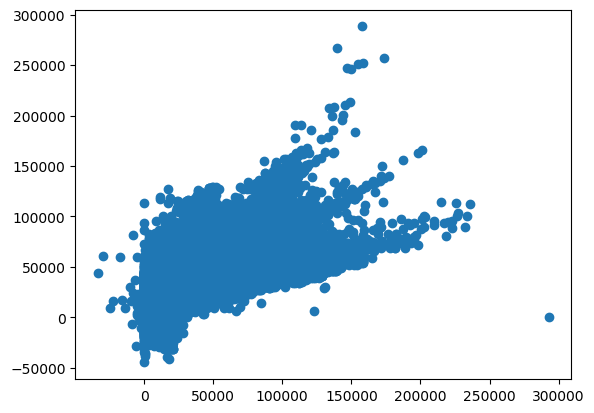

In [150]:
plt.scatter(y_test, all_preds)

In [132]:
from sklearn import metrics 

In [151]:
np.sqrt(metrics.mean_squared_error(y_test, all_preds))

11592.010286298273

In [155]:
%store all_preds

Stored 'all_preds' (ndarray)


In [156]:
%store y_test

Stored 'y_test' (Series)


In [157]:
%store X_test_sc

Stored 'X_test_sc' (ndarray)


In [158]:
%store y_train

Stored 'y_train' (Series)


In [159]:
%store X_train_sc

Stored 'X_train_sc' (ndarray)
